## Using cattle breed dataset from kaggle

This Cattle Breeds Dataset consists of 5 different breeds [Ayrshire, Brown Swiss, Holstein Friesian, Jersey, Red Dane].

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests
import zipfile
from pathlib import Path

import os
import random
from PIL import Image

In [2]:
image_data_path = Path("./data/archive/Cattle Breeds")

def walk_through(image_data_path):
    image_dirs = []
    for dirpath, dirnames, filenames in os.walk(image_data_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
        temp = Path(dirpath)
        image_dirs.append(temp)
    return image_dirs
    
image_dirs = walk_through(image_data_path)
image_dirs.pop(0)

There are 5 directories and 0 images in 'data/archive/Cattle Breeds'.
There are 0 directories and 260 images in 'data/archive/Cattle Breeds/Ayrshire cattle'.
There are 0 directories and 238 images in 'data/archive/Cattle Breeds/Brown Swiss cattle'.
There are 0 directories and 254 images in 'data/archive/Cattle Breeds/Holstein Friesian cattle'.
There are 0 directories and 252 images in 'data/archive/Cattle Breeds/Jersey cattle'.
There are 0 directories and 204 images in 'data/archive/Cattle Breeds/Red Dane cattle'.


PosixPath('data/archive/Cattle Breeds')

In [3]:
image_dirs

[PosixPath('data/archive/Cattle Breeds/Ayrshire cattle'),
 PosixPath('data/archive/Cattle Breeds/Brown Swiss cattle'),
 PosixPath('data/archive/Cattle Breeds/Holstein Friesian cattle'),
 PosixPath('data/archive/Cattle Breeds/Jersey cattle'),
 PosixPath('data/archive/Cattle Breeds/Red Dane cattle')]

In [4]:
image_dirs[0].name
list(image_dirs[0].glob("*.jpg"))

[PosixPath('data/archive/Cattle Breeds/Ayrshire cattle/Ayrshirecattle0.jpg'),
 PosixPath('data/archive/Cattle Breeds/Ayrshire cattle/Ayrshirecattle0_c.jpg'),
 PosixPath('data/archive/Cattle Breeds/Ayrshire cattle/Ayrshirecattle1.jpg'),
 PosixPath('data/archive/Cattle Breeds/Ayrshire cattle/Ayrshirecattle10.jpg'),
 PosixPath('data/archive/Cattle Breeds/Ayrshire cattle/Ayrshirecattle100.jpg'),
 PosixPath('data/archive/Cattle Breeds/Ayrshire cattle/Ayrshirecattle100_c.jpg'),
 PosixPath('data/archive/Cattle Breeds/Ayrshire cattle/Ayrshirecattle101.jpg'),
 PosixPath('data/archive/Cattle Breeds/Ayrshire cattle/Ayrshirecattle101_c.jpg'),
 PosixPath('data/archive/Cattle Breeds/Ayrshire cattle/Ayrshirecattle102.jpg'),
 PosixPath('data/archive/Cattle Breeds/Ayrshire cattle/Ayrshirecattle102_c.jpg'),
 PosixPath('data/archive/Cattle Breeds/Ayrshire cattle/Ayrshirecattle103.jpg'),
 PosixPath('data/archive/Cattle Breeds/Ayrshire cattle/Ayrshirecattle103_c.jpg'),
 PosixPath('data/archive/Cattle Breed

In [5]:
# len(image_dirs)

In [6]:
images , label = [] , []

for path in image_dirs:
    image_paths = list(path.glob("*.jpg"))
    for image_path in image_paths:
        images.append(Image.open(image_path))
        label.append(path.name)

In [7]:
len(images)

1208

In [8]:
random.randint(1,255)

62

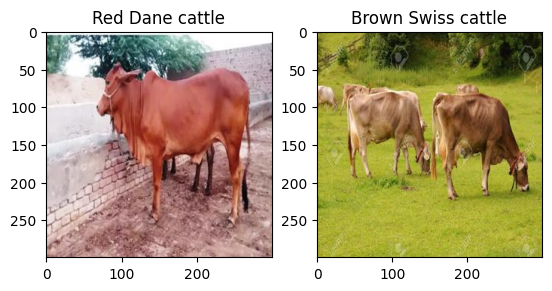

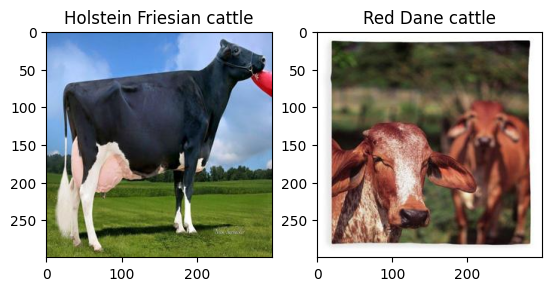

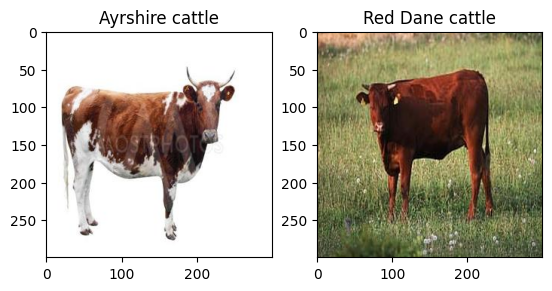

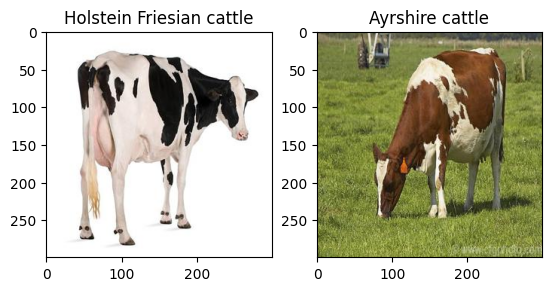

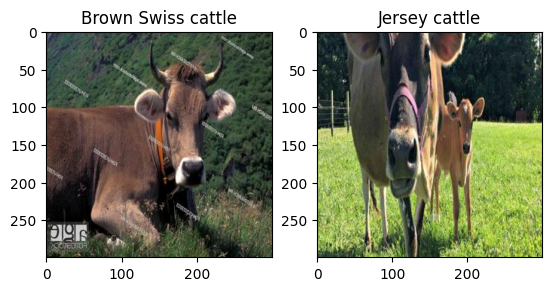

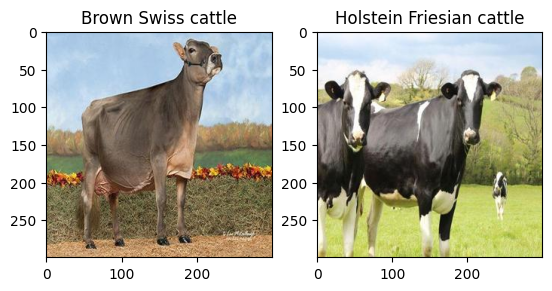

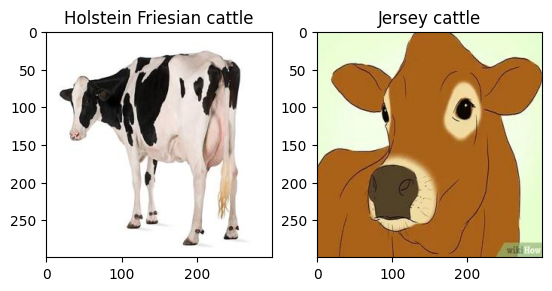

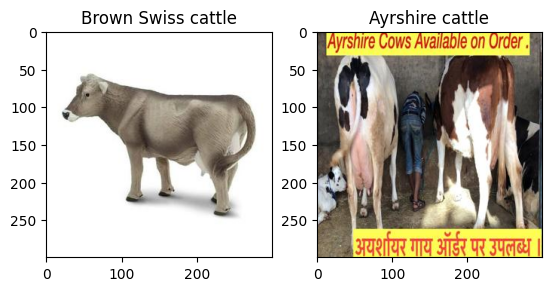

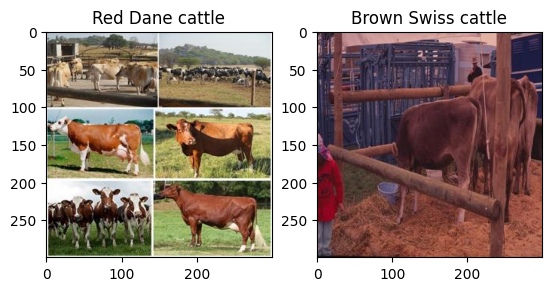

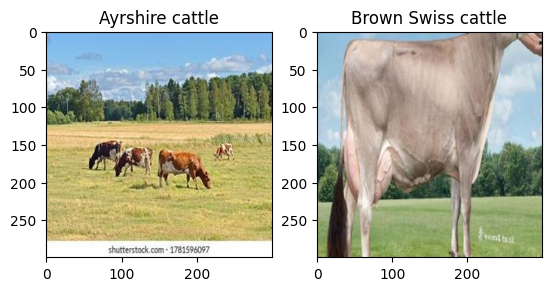

In [9]:
rows, cols = 1,2
for i in range(10):
    fig, axes = plt.subplots(rows,cols)
    a1 = int(random.randint(1,len(images)))
    a2 = int(random.randint(1,len(images)))
    axes[0].imshow(images[a1])
    axes[0].set_title(label[a1])
    axes[1].imshow(images[a2])
    axes[1].set_title(label[a2])
# plt.title(label[0])
# plt.show()

In [10]:
import torch
import torch.nn as nn
from torchvision.transforms import v2
from torch.utils.data import DataLoader
from typing import Tuple, Dict, List 
from torch.utils.data import Dataset

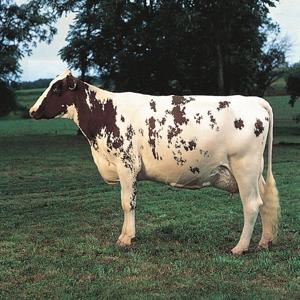

In [11]:
images[0]

In [12]:

H, W = 32, 32
# img = torch.randint(0, 256, size=(3, H, W), dtype=torch.uint8)
img = images[0]

transforms = v2.Compose([
    v2.Resize(size=(64,64)),
    v2.PILToTensor(),
])
img = transforms(img)
# plt.imshow(img[0]+img[1]+img[2])
img.shape

torch.Size([3, 64, 64])

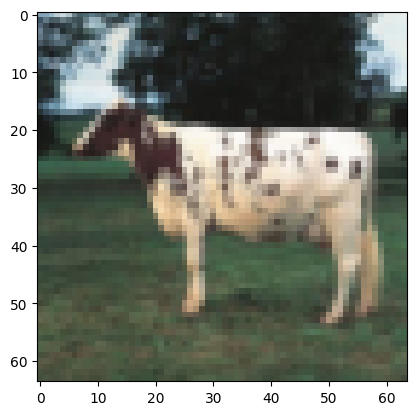

In [13]:
plt.imshow(img.permute((1,2,0)))

In [14]:

train_dataloader = DataLoader(dataset=images,
                             batch_size=1,
                             num_workers=1,
                             shuffle=True)
train_dataloader

# test_dataloader = DataLoader(dataset=test_data,
#                              batch_size=1,
#                              num_workers=1,
#                              shuffle=True)

In [15]:
def find_classes(dir: str) -> Tuple[List[str], Dict[str,int]] :
    classes = sorted([entry.name for entry in list(os.scandir(dir)) if entry.is_dir()])

    if not classes:
        print("Couldn't find any classes in target directory")
        return None
    class_idx = {class_name: i for i,class_name in enumerate(classes)}
    return classes, class_idx

In [16]:
find_classes(image_data_path)

(['Ayrshire cattle',
  'Brown Swiss cattle',
  'Holstein Friesian cattle',
  'Jersey cattle',
  'Red Dane cattle'],
 {'Ayrshire cattle': 0,
  'Brown Swiss cattle': 1,
  'Holstein Friesian cattle': 2,
  'Jersey cattle': 3,
  'Red Dane cattle': 4})

In [17]:
(image_data_path / list(os.scandir(image_data_path))[0]).glob("*.jpg")

<generator object Path.glob at 0x7fd744fc6130>

In [18]:
class ImageFolderCustom(Dataset):
    def __init__(self, target_dir: str, transform: None):
        self.classes = []
        self.class_idx = {}
        self.paths = []
        self.p,self.q = find_classes(target_dir)
        for path in image_dirs:
            image_paths = list(path.glob("*.jpg"))
            for image_path in image_paths:
                self.paths.append(image_path)
                self.classes.append(image_path.name)
                self.class_idx[image_path.name] = self.q[path.name]
        # self.classes, self.class_idx = find_classes(target_dir)
        self.transform = transform

    def loadImage(self, index):
        img = self.paths[index]
        return Image.open(img)

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, index) -> Tuple[torch.Tensor, int]:
        img = self.loadImage(index)
        class_name = self.paths[index].name
        class_idx = self.class_idx[class_name]

        if self.transform:
            return self.transform(img), class_idx
        else:
            return img, class_idx

In [19]:
data_transform = v2.Compose([
    v2.Resize(size=(128,128)),
    v2.ToTensor()
])

/home/groupe/vs_code/jupyter/env/lib/python3.11/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [20]:

img_custom = ImageFolderCustom(image_data_path, transform= data_transform)
# test_img_custom = ImageFolderCustom("./temp/data/pizza_steak_sushi/test", transform= data_transform)
len(img_custom.paths)

1208

In [21]:
img_custom_dataloader = DataLoader(img_custom, batch_size=64)
img_custom_dataloader

Feature batch shape: torch.Size([64, 3, 128, 128])
Labels batch shape: torch.Size([64])


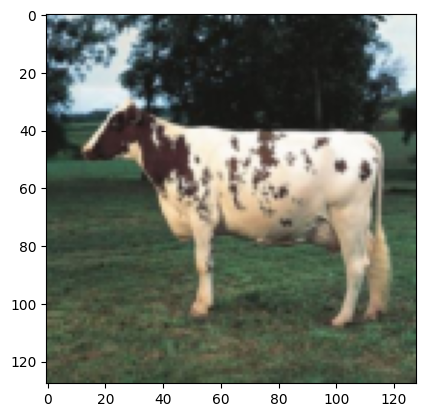

Label: 0


In [22]:
train_features, train_labels = next(iter(img_custom_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img.permute(1,2,0), cmap="gray")
plt.show()
print(f"Label: {label}")

In [23]:
train_size = int(0.8 * len(img_custom))
test_size = len(img_custom) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(img_custom, [train_size, test_size])

In [24]:
train_size, test_size

(966, 242)

In [25]:
train_dataloader = DataLoader(train_dataset, batch_size=64)
test_dataloader = DataLoader(test_dataset, batch_size=64)

Feature batch shape: torch.Size([64, 3, 128, 128])
Labels batch shape: torch.Size([64])


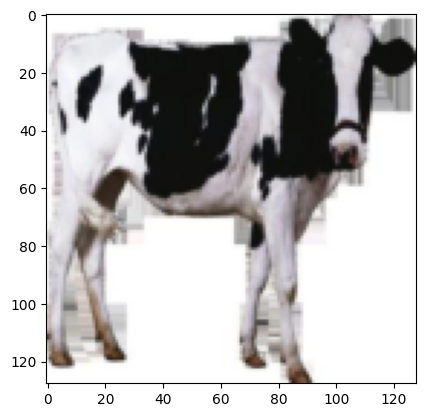

Label: 1


In [26]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img.permute(1,2,0), cmap="gray")
plt.show()
print(f"Label: {label}")

In [27]:
img_custom.classes

['Ayrshirecattle0.jpg',
 'Ayrshirecattle0_c.jpg',
 'Ayrshirecattle1.jpg',
 'Ayrshirecattle10.jpg',
 'Ayrshirecattle100.jpg',
 'Ayrshirecattle100_c.jpg',
 'Ayrshirecattle101.jpg',
 'Ayrshirecattle101_c.jpg',
 'Ayrshirecattle102.jpg',
 'Ayrshirecattle102_c.jpg',
 'Ayrshirecattle103.jpg',
 'Ayrshirecattle103_c.jpg',
 'Ayrshirecattle104.jpg',
 'Ayrshirecattle104_c.jpg',
 'Ayrshirecattle105.jpg',
 'Ayrshirecattle105_c.jpg',
 'Ayrshirecattle106.jpg',
 'Ayrshirecattle106_c.jpg',
 'Ayrshirecattle107.jpg',
 'Ayrshirecattle107_c.jpg',
 'Ayrshirecattle109.jpg',
 'Ayrshirecattle109_c.jpg',
 'Ayrshirecattle10_c.jpg',
 'Ayrshirecattle11.jpg',
 'Ayrshirecattle111.jpg',
 'Ayrshirecattle111_c.jpg',
 'Ayrshirecattle113.jpg',
 'Ayrshirecattle113_c.jpg',
 'Ayrshirecattle116.jpg',
 'Ayrshirecattle116_c.jpg',
 'Ayrshirecattle117.jpg',
 'Ayrshirecattle117_c.jpg',
 'Ayrshirecattle118.jpg',
 'Ayrshirecattle118_c.jpg',
 'Ayrshirecattle119.jpg',
 'Ayrshirecattle119_c.jpg',
 'Ayrshirecattle11_c.jpg',
 'Ayrshireca

In [28]:
512*4*4,128/pow(2,5)

(8192, 4.0)

# Building resnet-50 model

In [29]:
class block(nn.Module):
    def __init__(self,in_channels, out_channels, downsample=None, stride=1):
        super(block,self).__init__()
        self.expansion = 4
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=1, padding=0)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=stride, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.conv3 = nn.Conv2d(out_channels, out_channels*self.expansion, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(out_channels*self.expansion)
        self.downsample = downsample
        self.relu = nn.ReLU()

    def forward(self,x):
        identity = x
        # print("Block: ")
        # print("Shape of X: ",x.shape)
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        # print("Shape of X after conv1: ",x.shape)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        # print("Shape of X after conv2: ",x.shape)
        x = self.conv3(x)
        x = self.bn3(x)
        # print("Shape of X after conv3: ",x.shape)

        if self.downsample is not None:
            # print("Downsample: ",self.downsample.parameters)
            identity = self.downsample(x)
        x = x + identity
        # print("Shape of X after adding identity: ",x.shape)
        x = self.relu(x)
        return x

In [30]:
class Resnet(nn.Module):
    def __init__(self, block, layers, image_channels, num_classes=10):
        super(Resnet, self).__init__()
        self.in_channels = 64
        
        self.conv1 = nn.Conv2d(image_channels, 64, kernel_size=7, stride=2, padding=3)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU()
        self.mp1 = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.in_channels = 64
        self.layer0 = self._make_layer(block, layers[0], out_channels=64, stride=1)
        # self.in_channels = 128
        self.layer1 = self._make_layer(block, layers[1], out_channels=128, stride=2)
        # self.in_channels = 256
        self.layer2 = self._make_layer(block, layers[2], out_channels=256, stride=2)
        # self.in_channels = 512
        self.layer3 = self._make_layer(block, layers[3], out_channels=512, stride=2)

        self.avg_pool = nn.AdaptiveAvgPool2d((1,1))

        self.fc = nn.Linear(512*4, num_classes)

    def forward(self,x):
        # print("Resnet: ")
        # print("Shape of x: ",x.shape)
        x = self.conv1(x)
        # print(x.shape)
        x = self.bn1(x)
        # print(x.shape)
        x = self.relu(x)
        # print("Shape of x after conv1: ",x.shape)
        # print(x.shape)
        x = self.mp1(x)
        # print(x.shape)
        # print("Shape of x after maxpool: ",x.shape)

        x = self.layer0(x)
        # print(x.shape)
        # print("Shape of x after layer0: ",x.shape)
        x = self.layer1(x)
        # print(x.shape)
        # print("Shape of x after layer1: ",x.shape)
        x = self.layer2(x)
        # print(x.shape)
        # print("Shape of x after layer2: ",x.shape)
        x = self.layer3(x)
        # print(x.shape)
        # print("Shape of x after layer3: ",x.shape)
        
        x = self.avg_pool(x)
        # print(x.shape)
        # print("Shape of x after pooling: ",x.shape)
        x = x.reshape(x.shape[0],-1)
        # print(x.shape)
        # print("Shape of x after reshape: ",x.shape)
        x = self.fc(x)
        # print(x.shape)
        # print("Shape of x after fully-connected: ",x.shape)

        return x


    def _make_layer(self, block, num_blocks, out_channels ,stride=1):
        layers = []
        downsample = None

        if stride != 1 or self.in_channels != out_channels*4:
            downsample = nn.Sequential(
                nn.Conv2d(out_channels*4, out_channels*4, kernel_size=1, stride=1),
                nn.BatchNorm2d(out_channels*4)
            )

        layers.append(block(self.in_channels, out_channels, downsample, stride))
        self.in_channels = out_channels*4
        for i in range(num_blocks-1):
            layers.append(block(self.in_channels, out_channels))

        return nn.Sequential(*layers)
        
        

In [31]:
num_classes = len(img_custom.p)
num_epochs = 20
batch_size = 16
learning_rate = 0.01

model = Resnet(block, [3, 4, 6, 3], 3, num_classes)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.001, momentum = 0.9)  

# Train the model
# total_step = len(train_dataloader)

In [32]:
# total_step

In [16]:
from torchview import draw_graph

# model = testInceptionBlock()

architecture = 'Resnet50'
model_graph = draw_graph(model, input_size=(64,3,224,224), graph_dir ='TB' , roll=True, expand_nested=True, graph_name=f'self_{architecture}',save_graph=True,filename=f'self_{architecture}')
# model_graph.visual_graph

Resnet: 
Shape of x:  torch.Size([64, 3, 224, 224])
Shape of x after conv1:  torch.Size([64, 64, 112, 112])
Shape of x after maxpool:  torch.Size([64, 64, 56, 56])
Block: 
Shape of X:  torch.Size([64, 64, 56, 56])
Shape of X after conv1:  torch.Size([64, 64, 56, 56])
Shape of X after conv2:  torch.Size([64, 64, 56, 56])
Shape of X after conv3:  torch.Size([64, 256, 56, 56])
Downsample:  <bound method Module.parameters of Sequential(
  (0): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
  (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)>
Shape of X after adding identity:  torch.Size([64, 256, 56, 56])
Block: 
Shape of X:  torch.Size([64, 256, 56, 56])
Shape of X after conv1:  torch.Size([64, 64, 56, 56])
Shape of X after conv2:  torch.Size([64, 64, 56, 56])
Shape of X after conv3:  torch.Size([64, 256, 56, 56])
Shape of X after adding identity:  torch.Size([64, 256, 56, 56])
Block: 
Shape of X:  torch.Size([64, 256, 56, 56])
Shape of X after c

In [33]:
from tqdm.auto import tqdm
from timeit import default_timer as timer

In [34]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params = model.parameters(),
    lr = 0.1
)

In [35]:
torch.manual_seed(42)
train_start_time = timer()

epochs = 1

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n")
    train_loss = 0
    
    for batch, (X,y) in enumerate(train_dataloader):
        print(batch,X.shape,y.shape)
        model.train()

        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()
        
        del X,y
        
        if batch == 3:
            break

#         if batch % 10 == 0:
#             print(f"Batches {batch*len(X)}/{len(train_dataloader.dataset)} samples finished.")

    train_loss /= len(train_dataloader)

    test_loss, test_acc = 0,0

    model.eval()

#     with torch.inference_mode():
#         for X_test, y_test in test_dataloader:
#             test_pred = model_0(X_test)
#             test_loss += loss_fn(test_pred, y_test)
#             test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

#         test_loss /= len(test_dataloader)
#         test_acc /= len(test_dataloader)

#     print(f"\nTrain Loss: {train_loss:.4f} Test loss: {test_loss:.4f} Test acc: {test_acc}")


train_end_time = timer()

print(f"Total time = {train_end_time - train_start_time}")

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 0

0 torch.Size([64, 3, 128, 128]) torch.Size([64])
1 torch.Size([64, 3, 128, 128]) torch.Size([64])
2 torch.Size([64, 3, 128, 128]) torch.Size([64])
3 torch.Size([64, 3, 128, 128]) torch.Size([64])
Total time = 57.97232932099999


In [36]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_dataloader:
#         images = images.to(device)
#         labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        del images, labels, outputs
        print(correct,total)

    print('Accuracy of the network on the {} test images: {} %'.format(10000, 100 * correct / total))   

21 64
29 128
44 192
51 242
Accuracy of the network on the 10000 test images: 21.074380165289256 %


In [42]:

from torchview import draw_graph

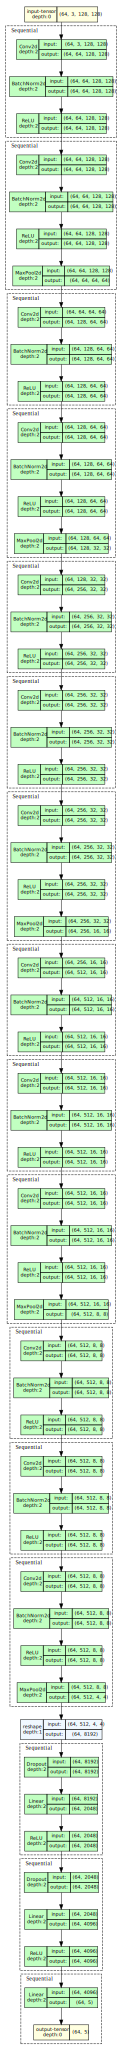

In [43]:
architecture = 'Resnet'
model_graph = draw_graph(model, input_size=(64,3,128,128), graph_dir ='TB' , roll=True, expand_nested=True, graph_name=f'self_{architecture}',save_graph=True,filename=f'self_{architecture}')
model_graph.visual_graph
